In [94]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
df=pd.read_csv('soft5.csv');
from scipy.special import boxcox, inv_boxcox

df.head(10)

,Time,Fault
0,0,0
1,1,2
2,2,0
3,3,2
4,4,3
5,5,3
6,6,6
7,7,8
8,8,8
9,9,12


In [95]:
length=len(df['Fault'])
sum=0;
for i in range(1,length):
    sum= sum+df['Fault'][i]
    df['Fault'][i]=sum
    #print(sum)

df.head(10)

,Time,Fault
0,0,0
1,1,2
2,2,2
3,3,4
4,4,7
5,5,10
6,6,16
7,7,24
8,8,32
9,9,44


In [96]:
##Data Transformation when Lemda=zero
df['Fault1']=df['Fault']
df.Fault1=df.Fault1.astype(float)
df.head(10)
    

,Time,Fault,Fault1
0,0,0,0.0
1,1,2,2.0
2,2,2,2.0
3,3,4,4.0
4,4,7,7.0
5,5,10,10.0
6,6,16,16.0
7,7,24,24.0
8,8,32,32.0
9,9,44,44.0


In [97]:
length= len(df['Fault1'])
lemda = .5
for i in range(1,length):
    df['Fault1'][i] = boxcox(df['Fault1'][i] , lemda)
    

df.head(10)

<ipython-input-97-8bee7b3e92c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault1'][i] = boxcox(df['Fault1'][i] , lemda)


,Time,Fault,Fault1
0,0,0,0.000000
1,1,2,0.828427
2,2,2,0.828427
3,3,4,2.000000
4,4,7,3.291503
5,5,10,4.324555
6,6,16,6.000000
7,7,24,7.797959
8,8,32,9.313708
9,9,44,11.266499


In [98]:
class LinarRegression:
    def __init__ (self,TempDataInput, TempDataFaults):
        self.TempDataInput=TempDataInput
        self.TempDataFaults=TempDataFaults
        self.predictResult=[]
        self.nextresult=[]

        
    def calculation(self):
        self.mean_x=np.mean(self.TempDataInput)
        self.mean_y=np.mean(self.TempDataFaults)
        print("MeanX and MeanY",self.mean_x,self.mean_y)
        
        self.numer=0.0
        self.dnum=0.0
        
        for i in range(len(self.TempDataInput)):
            self.numer+=(self.TempDataInput[i]-self.mean_x)*(self.TempDataFaults[i]-self.mean_y)
            self.dnum+=(self.TempDataInput[i]-self.mean_x)*(self.TempDataInput[i]-self.mean_x)
            
        self.cof_= self.numer/self.dnum
        self.intercept_=self.mean_y -(self.mean_x*self.cof_)
        
        print(f"Coefficiant {self.cof_}  and intercept {self.intercept_}")
        
        for i in self.TempDataInput:
            self.predictResult.append((i*self.cof_ +self.intercept_))
    
    def predict(self,val):
        return val*self.cof_+self.intercept_
            
            
    def DrawGraph(self):
        plt.xlabel='Year'
        plt.ylabel='Fault'
        #plt.scatter(df.Year,df.percent,color='RED', marker='+')
        plt.plot(self.TempDataInput,self.TempDataFaults,color='blue',marker='+')
        plt.plot(self.TempDataInput,self.predictResult,color='RED',marker='+')
        
    def NextPrediction(self, start, end, dist):
        ##PredictNext5data Analysis
        self.totalError=0.0;
        for i in range(start,end):
            self.temp= (i*self.cof_ +self.intercept_)
            self.nextresult.append(self.temp);
            
        self.revers = inv_boxcox(self.nextresult , lemda)
        
        
        for i in range(start,end):
            self.totalError+=abs(self.nextresult[i-start]-df['Fault'][i])
            print(i," act=",df['Fault'][i], "predict",self.nextresult[i-start],"RE", (abs((self.nextresult[i-start]-df['Fault'][i])))/(df['Fault'][i]))
        print("** The average Value ",self.totalError/dist )
        
        plt.xlabel='Year'
        plt.ylabel='Fault'
        #plt.scatter(df.Year,df.percent,color='RED', marker='+')
        
        
        templist=[]
        templist2=[]
        for i in range(start,end):
            templist.append(i);
            templist2.append(df['Fault'][i])
        #plt.plot(templist,templist2,color='blue',marker='+')
        #plt.plot(templist, self.revers,color='RED',marker='+')
            
                                                       
    


MeanX and MeanY 5.5 5.834801728019646
Coefficiant 1.4039179543387965  and intercept -1.8867470208437345
11  act= 60 predict 13.556350476883026 RE 0.7740608253852829
12  act= 65 predict 14.960268431221824 RE 0.7698420241350489
13  act= 69 predict 16.364186385560618 RE 0.7628378784701361
14  act= 75 predict 17.768104339899416 RE 0.7630919421346745
15  act= 85 predict 19.17202229423821 RE 0.7744467965383739
** The average Value  54.43581361443938


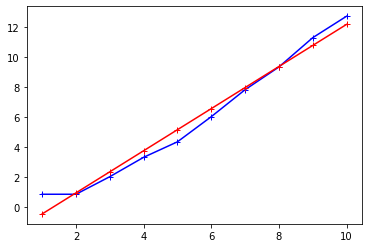

In [100]:
#################################### 10X5 ##############################
First_TenDataInput=[];
First_TenDataFults=[];
for i in range(1,11):
    First_TenDataInput.append(i)
    First_TenDataFults.append(df['Fault1'][i])

l1=LinarRegression(First_TenDataInput,First_TenDataFults);    
l1.calculation()
l1.DrawGraph()
l1.NextPrediction(11,16,5)
del l1

MeanX and MeanY 10.5 11.29981564519216
Coefficiant 1.0930831813765038  and intercept -0.1775577592611306
21  act= 126 predict 22.77718904964545 RE 0.8192286583361473
22  act= 129 predict 23.870272231021954 RE 0.8149591299920779
23  act= 131 predict 24.963355412398457 RE 0.8094400350198591
24  act= 134 predict 26.05643859377496 RE 0.8055489657180973
25  act= 142 predict 27.149521775151467 RE 0.8088061846820319
26  act= 148 predict 28.24260495652797 RE 0.8091715881315678
27  act= 155 predict 29.335688137904473 RE 0.8107374958844873
28  act= 163 predict 30.428771319280976 RE 0.8133204213541045
29  act= 165 predict 31.52185450065748 RE 0.8089584575717729
30  act= 168 predict 32.61493768203398 RE 0.805863466178369
** The average Value  118.4039366341603


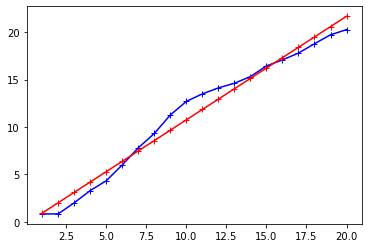

In [102]:
#################################### 20X10 ##############################
First_20DataInput=[];
First_20DataFults=[];
for i in range(1,21):
    First_20DataInput.append(i)
    First_20DataFults.append(df['Fault1'][i])

l2=LinarRegression(First_20DataInput,First_20DataFults);    
l2.calculation()
l2.DrawGraph()
l2.NextPrediction(21,31,10)
del l2

MeanX and MeanY 15.5 14.913864307038436
Coefficiant 0.8216395360748628  and intercept 2.1784514978780614
31  act= 172 predict 27.64927711619881 RE 0.8392483888593092
32  act= 175 predict 28.470916652273672 RE 0.8373090477012933
33  act= 178 predict 29.292556188348534 RE 0.8354350775935476
34  act= 182 predict 30.114195724423396 RE 0.8345373861295419
35  act= 186 predict 30.935835260498262 RE 0.8336783050510846
36  act= 191 predict 31.757474796573124 RE 0.8337304984472611
37  act= 195 predict 32.57911433264799 RE 0.8329276188069334
38  act= 199 predict 33.400753868722845 RE 0.832157015735061
39  act= 204 predict 34.222393404797714 RE 0.832243169584325
40  act= 205 predict 35.04403294087257 RE 0.8290534978494021
** The average Value  157.3533449714643


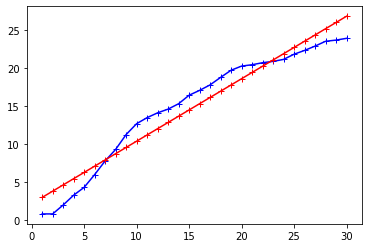

In [104]:
#################################### 30X10 ##############################
First_30DataInput=[];
First_30DataFults=[];
for i in range(1,31):
    First_30DataInput.append(i)
    First_30DataFults.append(df['Fault1'][i])

l3=LinarRegression(First_30DataInput,First_30DataFults);    
l3.calculation()
l3.DrawGraph()
l3.NextPrediction(31,41,10)
del l3

MeanX and MeanY 20.5 17.550705521936493
Coefficiant 0.6477247175975396  and intercept 4.272348811186932
41  act= 209 predict 30.829062232686056 RE 0.8524925252024591
42  act= 217 predict 31.476786950283596 RE 0.8549456822567576
43  act= 220 predict 32.12451166788114 RE 0.8539794924187221
44  act= 222 predict 32.77223638547867 RE 0.852377313578925
45  act= 228 predict 33.41996110307621 RE 0.8534212232321219
46  act= 241 predict 34.06768582067375 RE 0.8586403077980342
47  act= 250 predict 34.71541053827129 RE 0.8611383578469148
48  act= 256 predict 35.36313525586883 RE 0.8618627529067624
49  act= 263 predict 36.010859973466374 RE 0.8630765780476564
50  act= 266 predict 36.65858469106391 RE 0.8621857718381056
51  act= 269 predict 37.30630940866145 RE 0.8613148349120393
52  act= 273 predict 37.95403412625899 RE 0.8609742339697473
53  act= 278 predict 38.60175884385653 RE 0.8611447523602282
54  act= 284 predict 39.24948356145407 RE 0.8617975930934716
55  act= 290 predict 39.897208279051604 

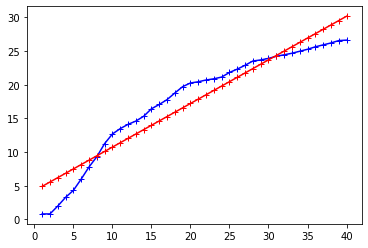

In [105]:
#################################### 40X15 ##############################
First_40DataInput=[];
First_40DataFults=[];
for i in range(1,41):
    First_40DataInput.append(i)
    First_40DataFults.append(df['Fault1'][i])

l4=LinarRegression(First_40DataInput,First_40DataFults);    
l4.calculation()
l4.DrawGraph()
l4.NextPrediction(41,56,15)
del l4